Boston Housing Price Prediction using Linear Regression


TASK 1:Load Boston dataset,
Display feature names, shape, and target variable description,
Convert to pandas DataFrame

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
boston=fetch_openml(name='boston')
print("Feature names:",boston.feature_names)
print("Shape:",boston.data.shape)
print("Target variable description:",boston.target[:5])
df=boston.frame
print("Dataframe:",df)

Feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Shape: (506, 13)
Target variable description: 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
Dataframe:         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


TASK 2:Plot histograms and pairplots,Compute correlation matrix,Heatmap visualization


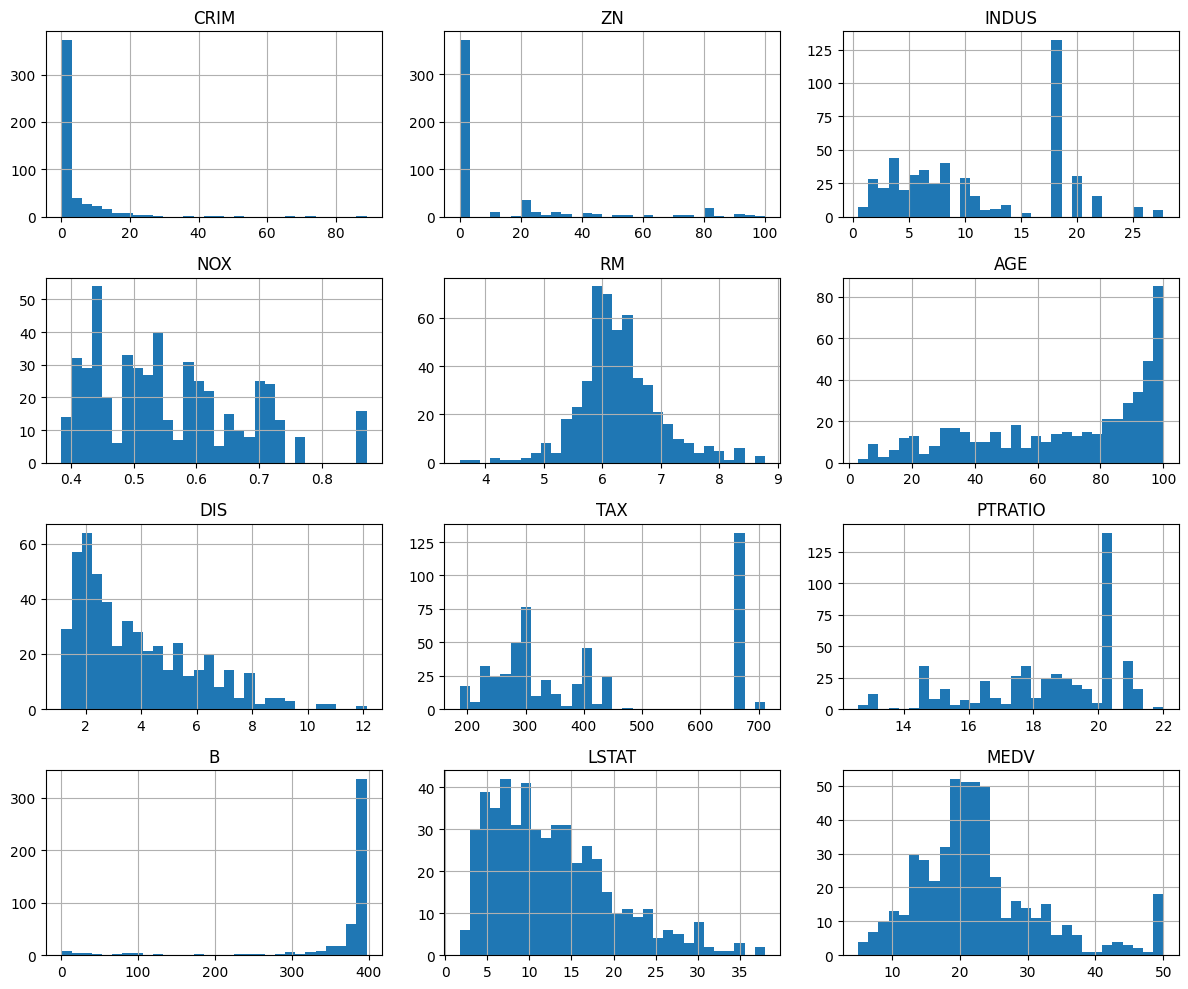

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=30,figsize=(12,10))
plt.tight_layout()
plt.show()

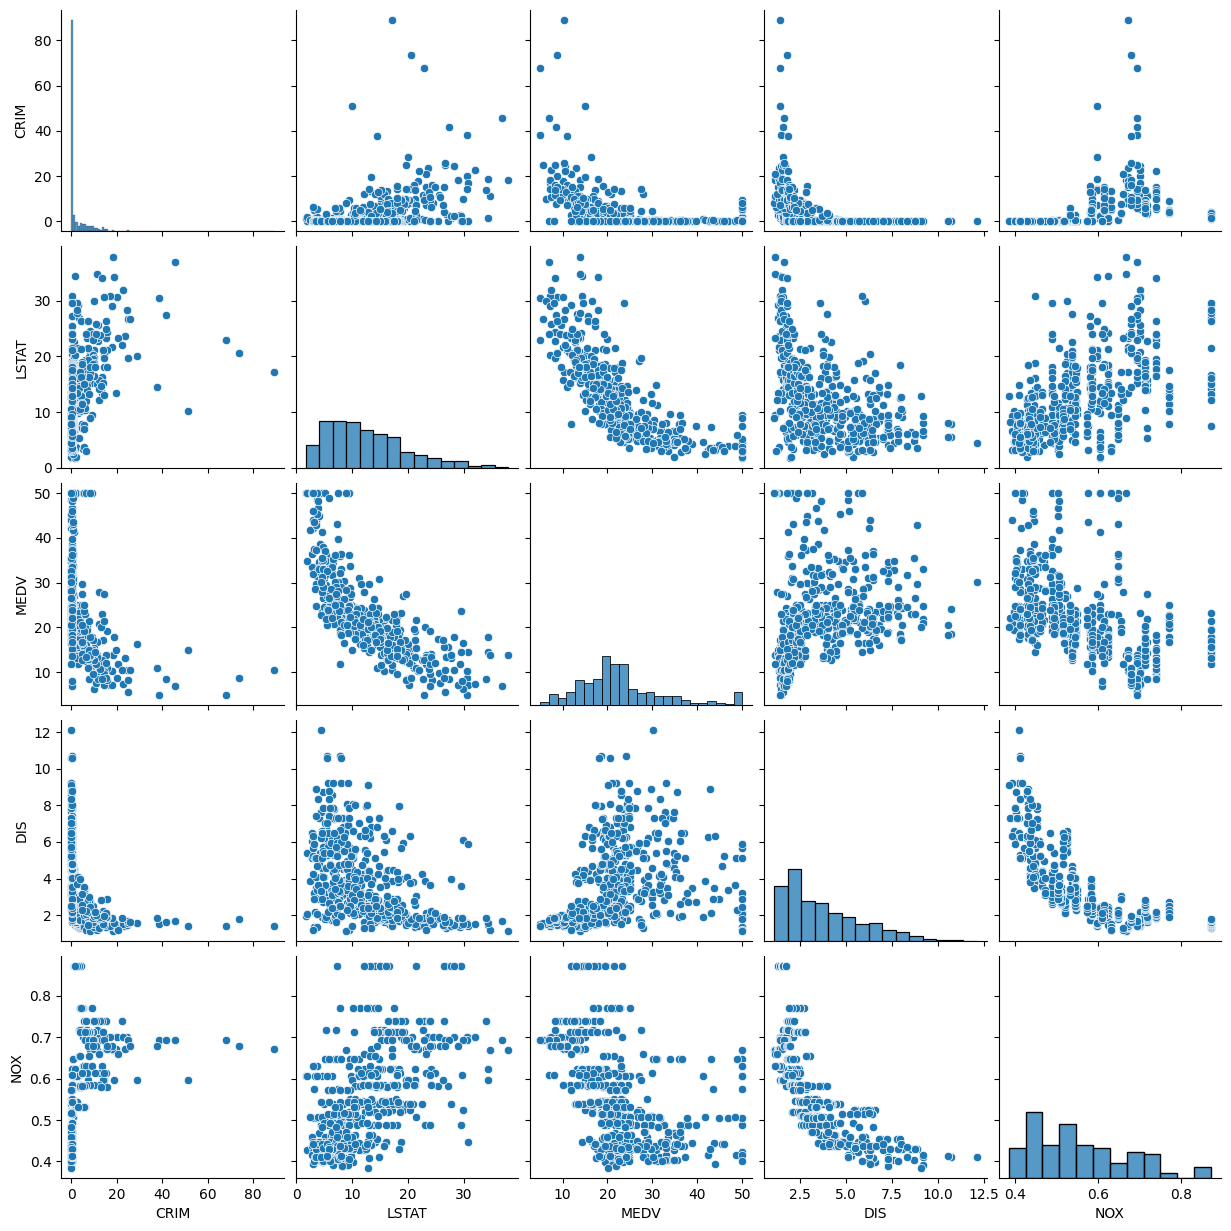

In [ ]:
sns.pairplot(df[['CRIM','LSTAT','MEDV','DIS','NOX']])
plt.show()

In [ ]:
corr_matrix=df.corr()
print("Correlation Matrix of TAX:",corr_matrix['TAX'])

Correlation Matrix of TAX: CRIM       0.582764
ZN        -0.314563
INDUS      0.720760
CHAS      -0.035587
NOX        0.668023
RM        -0.292048
AGE        0.506456
DIS       -0.534432
RAD        0.910228
TAX        1.000000
PTRATIO    0.460853
B         -0.441808
LSTAT      0.543993
MEDV      -0.468536
Name: TAX, dtype: float64


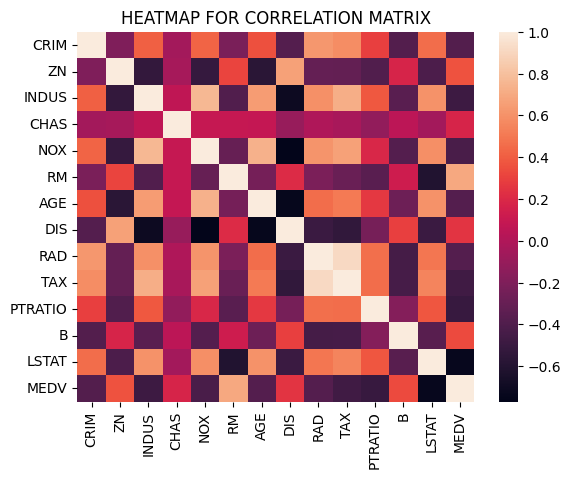

In [ ]:
sns.heatmap(corr_matrix)
plt.title("HEATMAP FOR CORRELATION MATRIX")
plt.show()

Task 3:Choose a single predictor (e.g., RM),Fit and evaluate model,Plot regression line


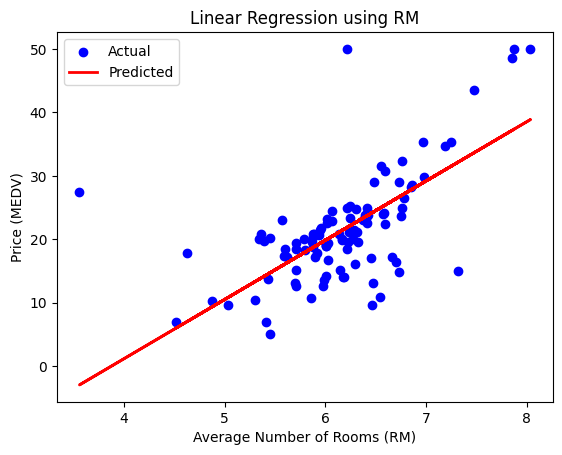

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Price (MEDV)')
plt.title('Linear Regression using RM')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df.drop('MEDV', axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Ensure the DataFrame `df` exists and is loaded correctly.
# Assuming `df` is already loaded from the previous steps.

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Convert object type columns to numeric, coercing errors to NaN
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop rows with NaN values that resulted from the coercion
X.dropna(inplace=True)
y = y[X.index] # Ensure y matches the filtered X indices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

TypeError: can't multiply sequence by non-int of type 'float'